# A Convolutional Neural Network implementation example in Keras

[Code for original example](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py)

### Set-up configurations

In [1]:
import numpy as np

Set the random seed, for reproducibility purposes

In [2]:
np.random.seed(42)

Number of elements processed in each training iteration

In [3]:
batch_size = 128

Number of possible classification classes (equal to the number of digits)

In [4]:
num_classes = 10

Number of full passes over the training data

In [5]:
epochs = 1

Input image dimensions

In [6]:
img_rows, img_cols = 28, 28

### Load the data

In [7]:
from keras.datasets import mnist

Using TensorFlow backend.


In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### A little bit of housekeeping...

In [9]:
import keras
from keras import backend as K

Different Keras' backends assume different data representations. We are using Tensorflow, but, you know, best practices ;)

In [10]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Set the tensors data type

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#### Visualize the data

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

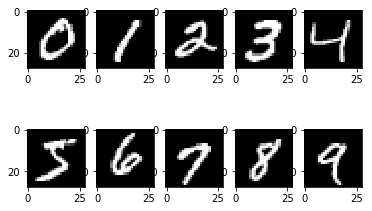

In [13]:
fig = plt.figure()
for digit in range(num_classes): # for each digit
    
    # get the first example of the digit available
    example_idx = np.where(y_train == digit)[0][0]
    x_example = x_train[example_idx].reshape(img_rows, img_cols)
    
    # add it to the plot
    ax = fig.add_subplot(2, 5, digit+1)
    ax.imshow(x_example, cmap='gray')

Normalize the valures from [0;255] to [0;1] range

In [14]:
x_train /= 255.
x_test /= 255.

Convert class vectors to binary class matrices

Current representation:

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
y_train = keras.utils.to_categorical(y_train, num_classes)

One-hot encoding representation:

In [17]:
y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

Apply it also to testing data

In [18]:
y_test = keras.utils.to_categorical(y_test, num_classes)

### Sanity check

Shape of the training tensor

In [19]:
x_train.shape

(60000, 28, 28, 1)

Number of samples for training

In [20]:
x_train.shape[0]

60000

Number of samples for testing

In [21]:
x_test.shape[0]

10000

## Build the model

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

A simple, one-directional architecture layout

In [23]:
model = Sequential()

#### Add the multiple layers

In [24]:
model.add(Conv2D(32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

ReLU

<img src="http://cs231n.github.io/assets/nn1/relu.jpeg">

Convolutional layer

<img src='http://engineering.flipboard.com/assets/convnets/Convolution_schematic.gif'>

Each convolutional layer has multiple filters in it:

<img src='https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/53c160301db12a6e.png'>

In [25]:
model.add(Conv2D(64, 
                 kernel_size=(3, 3),
                 activation='relu'))

In [26]:
model.add(MaxPooling2D(pool_size=(2,2)))

This is what max-pooling does:

<img src='https://shafeentejani.github.io/assets/images/pooling.gif'>

In [27]:
model.add(Dropout(0.25))

In [28]:
model.add(Flatten())

In [29]:
model.add(Dense(128, activation='relu'))

In [30]:
model.add(Dropout(0.5))

In [31]:
model.add(Dense(num_classes, activation='softmax'))

### Compile the model: set the loss and optimization definition

In [32]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Train the model

In [33]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 389s - loss: 0.3346 - acc: 0.8974 - val_loss: 0.0781 - val_acc: 0.9761


In [34]:
score = model.evaluate(x_test, y_test, verbose=0)

Test loss:

In [35]:
score[0]

0.078140090218931438

Test accuracy:

In [36]:
score[1]

0.97609999999999997

## Exercise 1.

Try running the model for more iterations (i.e. increase the 'epochs' variable to, e.g., 12). What do you detect? 

## Exercise 2. (the hard one)

Change the model definition (or create a new model) with the following layers configuration:
 * **2D Convolution**, with 32 filters and a 5x5 window, relu activation;
 * **Max-Polling**, with a factor of 2 horizontally and vertically;
 * **Dropout**, with probability of keeping the values of 0.7 (careful with this one ;) );
 * **2D Convolution**, with 64 filters and a 5x5 window, relu activation;
 * **Max-Polling**, with a factor of 2 horizontally and vertically;
 * **Dropout**, with probability of keeping the values of 0.7
 * **Flatten** the output, to prepare it for the fully-connected layer;
 * A **Dense** layer, with 1024 neurons;
 * An output **Dense** layer, with 10 neuros, activated with softmax.


Does the result improve?


(TIP: Go to [Keras documentation](https://keras.io/) to see the layers methods definition.)

## Exercise 3.

Vary the dropout to 0, and compare the training accuracy in the test dataset. Can you gess what would happend if you set the dropout to 1?

## Exercise 4. (the hardest one)

Can you come up with an architecture and configuration that improves on the previous results? Show it ;)